In [4]:
from utils import CleanData
from models.DecisionTree import DecisionTree
from models.neural_network import NeuralNetwork
from plotData import plotData
import warnings
from sklearn.metrics import accuracy_score
import numpy as np

warnings.filterwarnings('ignore')

            3.6216       8.6661      -2.8073     -0.44699            0
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


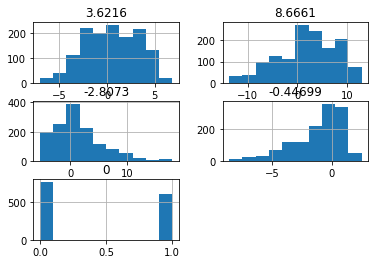

In [5]:
intial_dataframe = CleanData("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")
intial_dataframe.describeData()

In [6]:
column_names = ["variance", "skewness", "curtosis", "entropy", "classification"]
X_train, X_test, y_train, y_test = intial_dataframe.splitData(1 / 3, 42, column_names);

In [7]:
Tree_class = DecisionTree (len(column_names))
tab_log_loss_tree, tab_log_loss_tree_box, optimal_depth = Tree_class.cross_validation(X_train, y_train)

In [8]:
print("Optimal depth = ", optimal_depth)

Optimal depth =  3


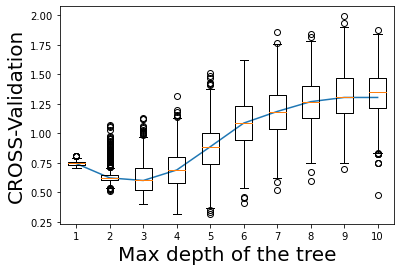

In [9]:
Tree_class.plot(X_train, y_train)

In [11]:
y_tree, y_forest, y_ada = Tree_class.adjust_classification(X_train, X_test, y_train, optimal_depth)

KeyError: 'variance'

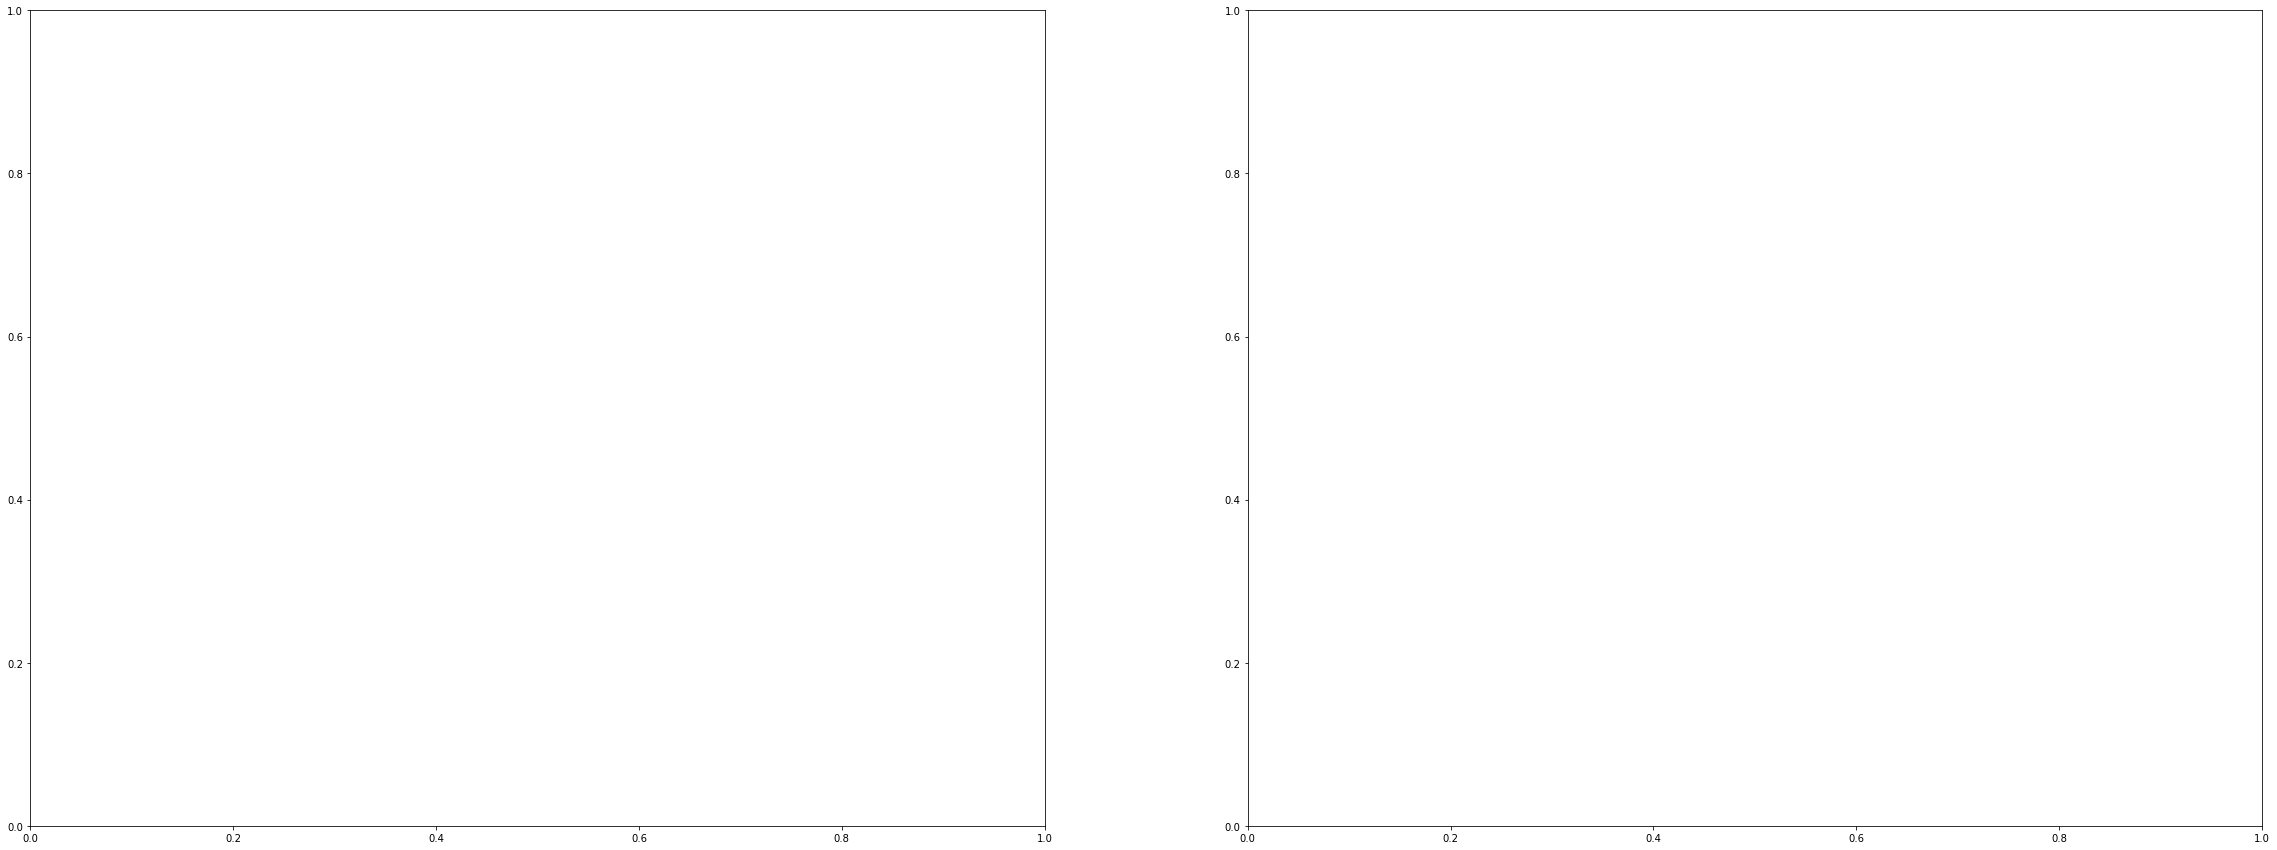

In [12]:
plotData(X_test, y_test, y_tree, "variance", "entropy", "DecisionTree")

In [ ]:
plotData(X_test, y_test, y_forest, "variance", "entropy", "RandomForest")

In [ ]:
plotData(X_test, y_test, y_ada, "variance", "entropy", "AdaBoost")

In [ ]:
banknoteData.calculate_metrics(y_tree)

In [ ]:
banknoteData.calculate_metrics(y_forest)

In [ ]:
banknoteData.calculate_metrics(y_ada)

In [ ]:
neuralModels = []
neuralMetric = []

layers_sizes= [(5,2),(4,2),(6,2),(3,2),(4,4,2)]
activations=["logistic", "tanh"]
learning_rate=np.linspace(0.001,0.1,10)


for layerSize in layers_sizes:
    for activation in activations:
        for lr in learning_rate:
            modelNeural = NeuralNetwork(solver="lbfgs", layers_sizes=layerSize, activation=activation, learning_rate=lr)
            neuralModels.append((layerSize, activation, lr))
            y_pred=modelNeural.fitAndScore(X_train, X_test, y_train, y_test)
            neuralMetric.append(accuracy_score(y_test,y_pred))
max_value = max(neuralMetric)
max_index = neuralMetric.index(max_value)

print("The neural network with the best accuracy has the parameters: layer size", {neuralModels[max_index][0]}, "activation function",{neuralModels[max_index][1]}, "learning rate",{neuralModels[max_index][2]}, "with an accuracy score of :", max_value)

            
